In [128]:
from os.path import expanduser
import csv
import time
import matplotlib.pyplot as plt
import numpy as np

home = expanduser('~')
file = open(home+'/sim_ws/experimentlog.csv', 'r')
csv_reader = csv.reader(file, delimiter=',')

In [129]:
print(file)
line_count = 0
x_list = []
y_list = []
yaw_list = []
speed_list = []
time_list = []
for row in csv_reader:
        if line_count == 0:
            print(f'{",         ".join(row)}')
            line_count += 1
        else:
            if (time_list == [] or float(row[4]) > time_list[-1]+0):
                x_list.append(float(row[0]))
                y_list.append(float(row[1]))
                yaw_list.append(float(row[2]))
                speed_list.append(float(row[3]))
                time_list.append(float(row[4]))
            #print(f'{row[0]}, {row[1]},  {row[2]}, {row[3]}, {row[4]}')
                line_count += 1

<_io.TextIOWrapper name='/home/bachelorubuntu/sim_ws/experimentlog.csv' mode='r' encoding='UTF-8'>
x,         y,         yaw,         speed,         time


In [135]:
from scipy.signal import lfilter

n = 150  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1
speed_list_filteret = lfilter(b, a, speed_list)

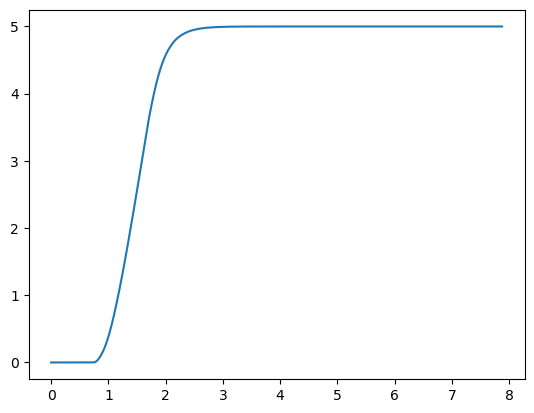

In [138]:
# Return double of n
def setuptime(n):
    return n - time_list[0]
 
# We double all numbers using map()
corrected_time = list(map(setuptime, time_list))

data_points = np.linspace(0,corrected_time[-1],len(time_list))

plt.plot(data_points, speed_list_filteret)
#plt.xlim(0, 2)
plt.show()

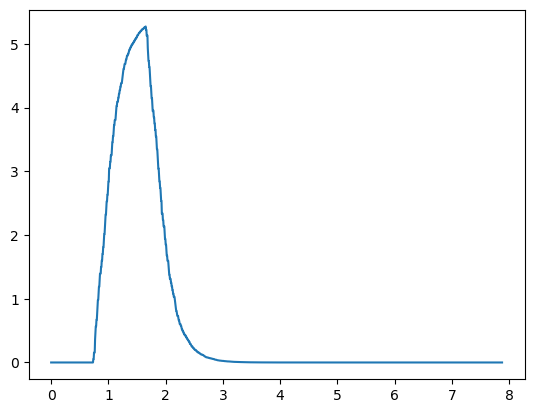

In [139]:
acceleration_list = [0]
for n in range(len(speed_list)-1):
    acceleration_list.append((speed_list_filteret[n+1]-speed_list_filteret[n])/(data_points[n+1]-data_points[n]))

plt.plot(data_points, acceleration_list)
#plt.xlim(0, 2)
plt.show()

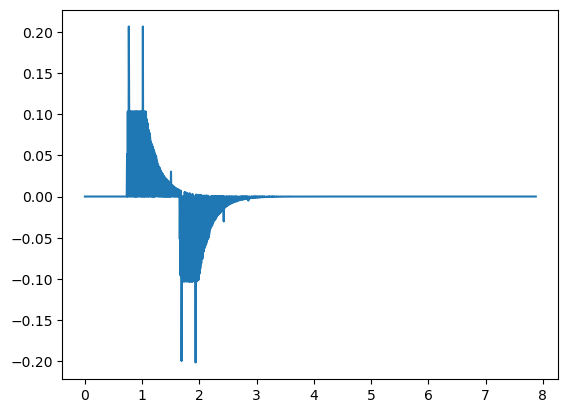

In [141]:
jerk_list = [0]
for n in range(len(acceleration_list)-1):
    jerk_list.append((acceleration_list[n+1]-acceleration_list[n]))

plt.plot(data_points, jerk_list)
#plt.xlim(0.7, 1)
plt.show()